# Sign Language Translator

In [6]:
import cv2,os

data_path='DATASET'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'test': 0, 'train': 1}
['test', 'train']
[0, 1]


In [8]:
data_path='DATASET/train/asl_alphabet_train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'Y']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [9]:
data_path='DATASET'

In [12]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [13]:
#print(labels_classes)
#print(categories)
print(label_classes_dict)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'space': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'Y': 24}


In [77]:
import numpy as np

In [82]:
img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:
    
    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        #print(img_names)
        for img_name in img_names:
            #print(img_name)
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)
            
            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #res=np.array(res)
                #print(type(res))
            #Converting the image into gray scale
                resized=cv2.resize(res,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                #print(data)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)
            
            
        
        

DATASET\test
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
DATASET\test\0
DATASET\test\A
DATASET\test\B
DATASET\test\C
DATASET\test\D
DATASET\test\E
DATASET\test\F
DATASET\test\G
DATASET\test\H
DATASET\test\I
DATASET\test\J
DATASET\test\K
DATASET\test\L
DATASET\test\M
DATASET\test\N
DATASET\test\O
DATASET\test\P
DATASET\test\Q
DATASET\test\R
DATASET\test\S
DATASET\test\T
DATASET\test\U
DATASET\test\V
DATASET\test\W
DATASET\test\X
DATASET\test\Y
DATASET\test\Z
DATASET\train
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
DATASET\train\0
DATASET\train\A
DATASET\train\B
DATASET\train\C
DATASET\train\D
DATASET\train\E
DATASET\train\F
DATASET\train\G
DATASET\train\H
DATASET\train\I
DATASET\train\J
DATASET\train\K
DATASET\train\L
DATASET\train\M
DATASET\train\N
DATASET\train\O
DATASET\train\P
DATASET\train\Q
DATASET\

In [83]:
datanp=np.array(data)

In [84]:
datanp.shape

(17113, 128, 128)

In [85]:
targetnp=np.array(target)

targetnp.shape

(17113,)

In [86]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [87]:
new_target.shape

(17113, 27)

In [88]:
np.save('data_img',data)
np.save('target',new_target)

In [89]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [90]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [91]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
sz = 128
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               3686528   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [92]:
from keras.callbacks import ModelCheckpoint

In [93]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=classifier.fit(train_data,train_target,shuffle=True,epochs=20,callbacks=[checkpoint],validation_split=0.3)

Train on 9583 samples, validate on 4107 samples
Epoch 1/20
9583/9583 [==============================] - 108s 11ms/step - loss: 2.3023 - accuracy: 0.3101 - val_loss: 0.5760 - val_accuracy: 0.8795
Epoch 2/20
9583/9583 [==============================] - 98s 10ms/step - loss: 0.7736 - accuracy: 0.7359 - val_loss: 0.1293 - val_accuracy: 0.9827
Epoch 3/20
9583/9583 [==============================] - 96s 10ms/step - loss: 0.4438 - accuracy: 0.8519 - val_loss: 0.0425 - val_accuracy: 0.9905
Epoch 4/20
9583/9583 [==============================] - 90s 9ms/step - loss: 0.3134 - accuracy: 0.8954 - val_loss: 0.0172 - val_accuracy: 0.9971
Epoch 5/20
9583/9583 [==============================] - 91s 10ms/step - loss: 0.2613 - accuracy: 0.9138 - val_loss: 0.0131 - val_accuracy: 0.9973
Epoch 6/20
9583/9583 [==============================] - 91s 9ms/step - loss: 0.2097 - accuracy: 0.9323 - val_loss: 0.0155 - val_accuracy: 0.9966
Epoch 7/20
9583/9583 [==============================] - 90s 9ms/step - loss: 

In [95]:
print(classifier.evaluate(test_data,test_target))

3423/3423 [==============================] - 8s 2ms/step
[0.006450053481155843, 0.9985392689704895]


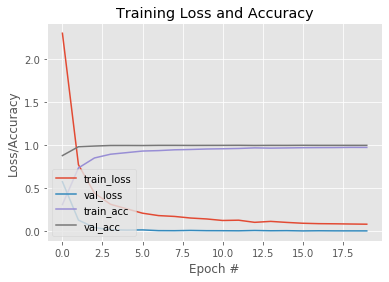

In [100]:
N = 20
H=history
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('evaluation.png')

In [104]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
classifier.save('model.h5')
print("Done !")

[INFO] saving mask detector model...
Done !


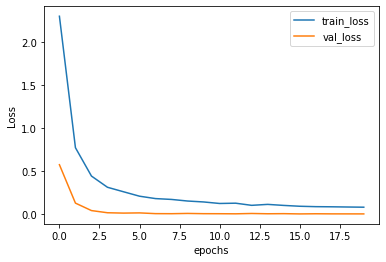

In [98]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

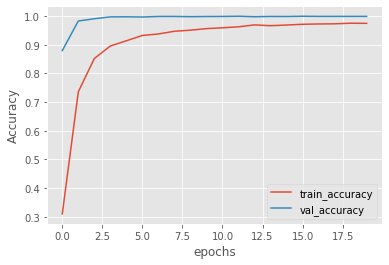

In [105]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('/model.h5')

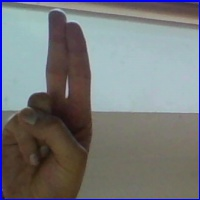

In [24]:
from IPython.display import display, Image
import cv2

# Load image
img = cv2.imread('U_test.jpg')

# Display image
_, png = cv2.imencode('.png', img)
display(Image(data=png))



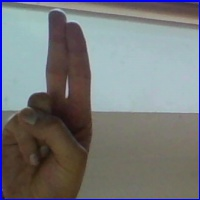

Predicted : U


In [23]:
import keras.utils as image
import numpy as np

from IPython.display import display, Image
import cv2

# Load image
img = cv2.imread('U_test.jpg')

# Display image
_, png = cv2.imencode('.png', img)
display(Image(data=png))
# Load image and preprocess it
img = image.load_img('U_test.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make prediction
preds = model.predict(x)
category = np.argmax(preds)

# Print predicted category
print("Predicted: "category)


In [ ]:
model = tf.keras.models.load_model('model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("SignModelconverted.tflite", "wb").write(tflite_model)